# PCA - World Happiness NB son aşaması

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("World Happiness 2015-2019.csv")

In [3]:
features = df.columns[5:] 

In [4]:
df_clean = df.dropna(subset=features)

In [5]:
X_clean = df_clean[features].values

In [6]:
scaler = StandardScaler()
X_scaled_clean = scaler.fit_transform(X_clean)

Üstteki kod:Ölçeklendirme, her bir özelliğin ortalamasını 0 ve standart sapmasını 1 olacak şekilde ayarlar.

fit_transform() metodu, X_clean veri setini ölçeklendirir ve ölçeklendirilmiş veriyi X_scaled_clean değişkenine atar.

In [7]:
pca = PCA(n_components=6)  # 6 bileşen seçildi

In [8]:
X_pca_clean = pca.fit_transform(X_scaled_clean)

In [9]:
pca_components = pca.components_

Üstteki kod: PCA modelinin bileşenlerini (yani, her temel bileşenin orijinal özellikler üzerindeki ağırlıklarını) içeren bir dizi alınır.

In [10]:
pca_loadings = pd.DataFrame(pca_components.T, index=features, 
                            columns=['PC{}'.format(i + 1) for i in range(6)])

Üstteki DataFrame, özelliklerin her bir temel bileşen içindeki önemini gösterir.

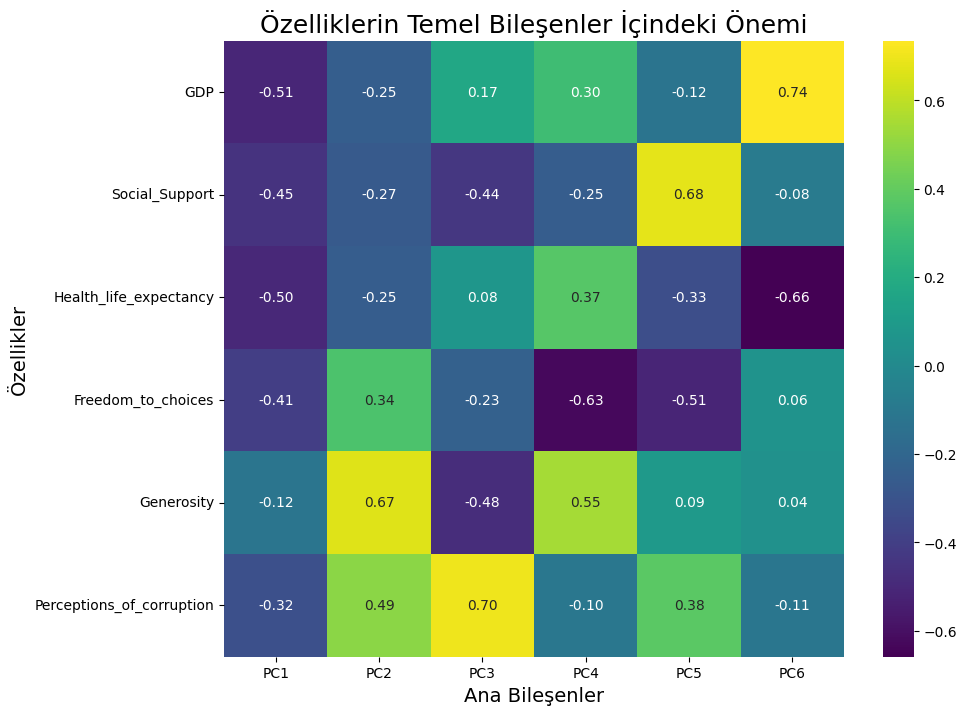

In [11]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(pca_loadings, annot=True, cmap="viridis", fmt=".2f")
plt.title('Özelliklerin Temel Bileşenler İçindeki Önemi', fontsize=18)
plt.ylabel('Özellikler', fontsize=14)
plt.xlabel('Ana Bileşenler', fontsize=14)
plt.show()

tablodaki değerlerden;

1.Temel Bileşenin kişi başına GSYİH-GDP, sağlıklı yaşam beklentisi-healty life exp. ve sosyal destek-social support üzerinde oldukça yüksek olumsuz yükleri bulunuyorken yaşam seçimleri yapma özgürlüğü-Freedom to make life choise üzerinde orta düzeyde olumsuz bir yükü bulunmaktadır. İkinci bileşen, cömertlik-generosity üzerinde yüksek pozitif yüke ve yolsuzluk algıları-perception of corr. üzerinde orta derecede pozitifyüke sahiptir. Üçüncü bileşen, yolsuzluk algısı-percep. of corr.  üzerinde yüksek olumsuz yüke ve cömertlik-generosity üzerinde orta derecede olumlu yüke sahiptir.